## Deep Learning Dataset 7

In [48]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [49]:
import pandas as pd
import pandas as np

In [50]:
import os
import scipy.io as sio

In [51]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
#import python libraries
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="0"; 
import keras
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Flatten, Dense, Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D, AveragePooling1D,BatchNormalization
from keras.engine.topology import get_source_inputs
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from keras.layers import Dropout
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow.compat.v1 as tf
s = tf.InteractiveSession()
tf.disable_v2_behavior()
import operator as op
from functools import reduce
from tqdm import tnrange,tqdm_notebook
import operator as op
from functools import reduce
import os
import scipy.io as sio

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [5]:
from keras.utils import to_categorical

In [6]:
## Importing required libraries
import numpy as np
import tensorflow.compat.v1 as tf
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()
tf.disable_v2_behavior()

/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
d_len = 100000
d_file_len = 100000
num_files = 1000

In [8]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [9]:
def concatDataTrigger(path):
    mats = []
    index = 0 
    fileNames = np.arange(100, (d_len + 100), 100).tolist()
    for r in range(0,num_files):
        mats.append(sio.loadmat(path+"trigger_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,num_files):
        for j in range(0,10):
            myArray.append(mats[i]['data'][j])
    return(myArray)

### Load Data

In [10]:
df_data1 = pd.read_csv('../DataFactory/FixedPlaintext/TS7_A.csv')

In [11]:
df_data1['label'] = 0

In [12]:
df_data2 = pd.read_csv('../DataFactory/FixedPlaintext/TS7_B.csv')

In [13]:
df_data2['label'] = 1

In [14]:
len(df_data1)

1000000

### Create Label

In [ ]:
df_label1 = df_data1['label']
df_data1 = df_data1.drop(['label'],axis=1)

In [ ]:
df_label2 = df_data2['label']
df_data2 = df_data2.drop(['label'],axis=1)

In [54]:
df_data = pd.concat([df_data1,df_data2])
df_data = df_data.reset_index()
df_data = df_data.to_numpy()
df_data = np.delete(df_data, 0, axis=1)

In [55]:
len(df_data)

2000000

In [56]:
df_label = pd.concat([df_label1,df_label2])
df_label = df_label.reset_index()
df_label = df_label.to_numpy()

In [57]:
df_label = df_label[:,-1]

### Split Label

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df_data,df_label,test_size=0.2,shuffle=True,stratify=df_label)

In [60]:
y_train = to_categorical(y_train,num_classes=2)

In [61]:
y_test = to_categorical(y_test,num_classes=2)

In [63]:
import numpy as np

In [64]:
X_train = np.array(X_train)

In [65]:
y_train = np.array(y_train)

In [68]:
X_test = np.array(X_test)

In [69]:
y_test = np.array(y_test)

In [70]:
from keras import backend as k

In [71]:
def createMLPModel():
    model = Sequential()
    model.add(Dense(120,input_dim=50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(90, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(2, activation='softmax'))
    optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1/100000000, decay=0.0, amsgrad=False)
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])   
    
    return model

In [88]:
tmpModel = createMLPModel()

In [89]:
trainedModel = tmpModel.fit(x=[X_train[0:80000]],
                            y=y_train[0:80000],
                            batch_size=1000,
                            verbose=1,
                            epochs=30
                            )

Epoch 1/30
80000/80000 [==============================] - 1s 15us/step - loss: 0.2822 - accuracy: 0.5002
Epoch 2/30
80000/80000 [==============================] - 1s 13us/step - loss: 0.2521 - accuracy: 0.5314
Epoch 3/30
80000/80000 [==============================] - 1s 13us/step - loss: 0.2462 - accuracy: 0.5550
Epoch 4/30
80000/80000 [==============================] - 1s 13us/step - loss: 0.2432 - accuracy: 0.5679
Epoch 5/30
80000/80000 [==============================] - 1s 13us/step - loss: 0.2403 - accuracy: 0.5799
Epoch 6/30
80000/80000 [==============================] - 1s 14us/step - loss: 0.2377 - accuracy: 0.5932
Epoch 7/30
80000/80000 [==============================] - 1s 14us/step - loss: 0.2351 - accuracy: 0.6019
Epoch 8/30
80000/80000 [==============================] - 1s 14us/step - loss: 0.2321 - accuracy: 0.6143
Epoch 9/30
80000/80000 [==============================] - 1s 15us/step - loss: 0.2292 - accuracy: 0.6206
Epoch 10/30
80000/80000 [==============================

In [90]:
gradient = K.gradients(tmpModel.output[0],tmpModel.input)

In [91]:
iterate = K.function([tmpModel.input], [gradient])

In [131]:
grad = iterate(np.array(X_test[0:900000],dtype=np.float128))

In [132]:
grad[0][0][0]

array([ 2.8983838e-09,  6.4452089e-11,  1.8025956e-11, -4.1650456e-09,
       -2.7872815e-09, -7.2432931e-09,  3.3139189e-09, -1.2038853e-09,
        7.1660242e-09, -5.9518204e-09,  1.4353754e-09, -3.5721107e-10,
        2.7518261e-09,  1.2265002e-09, -4.6451540e-09, -5.0097122e-09,
        1.1383935e-09, -6.2836536e-09,  1.0953668e-09, -1.8276796e-09,
        4.4322026e-09, -2.6415508e-09, -9.1958630e-10,  9.8600905e-11,
        1.4884154e-09, -1.9824788e-09,  6.7923365e-09,  1.8847779e-09,
       -4.0524704e-09, -2.8452742e-09, -7.5612610e-09,  5.7738245e-09,
       -2.1651372e-09, -1.6065066e-10, -4.0673291e-09,  2.1612421e-09,
        2.2248778e-09, -4.2708845e-09,  5.2106225e-10,  3.9503951e-09,
        2.2383777e-09,  3.4679104e-09,  6.3596710e-09, -3.2246175e-10,
        1.7720369e-09,  1.1332444e-09, -2.7529098e-10, -6.4854283e-10,
       -1.5163532e-09, -3.2881833e-10], dtype=float32)

In [133]:
grad

[[array([[ 2.8983838e-09,  6.4452089e-11,  1.8025956e-11, ...,
          -6.4854283e-10, -1.5163532e-09, -3.2881833e-10],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         ...,
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
         [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
           0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)]]

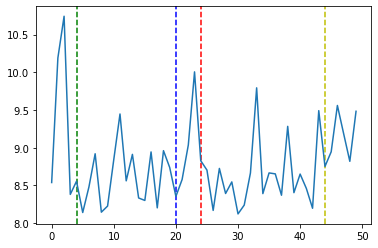

In [134]:
plt.axvline(x=24, color='r', linestyle='--')
plt.axvline(x=4, color='g', linestyle='--')
plt.axvline(x=44, color='y', linestyle='--')
plt.axvline(x=20, color='b', linestyle='--')
plt.plot(-np.log10(np.abs(grad[0][0][0])))
plt.show()

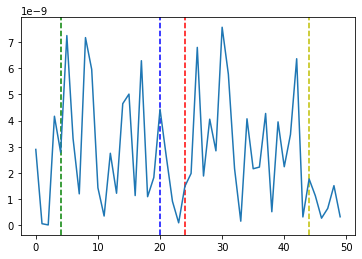

In [135]:
plt.axvline(x=24, color='r', linestyle='--')
plt.axvline(x=4, color='g', linestyle='--')
plt.axvline(x=44, color='y', linestyle='--')
plt.axvline(x=20, color='b', linestyle='--')
plt.plot(np.abs(grad[0][0][0]))
plt.show()